# DNN

Deep Neural Network 의 준말로, 이전 ANN은 은닉 계층이 하나였다면 DNN은 2개 이상의 은닉 계층을 구현한 방식이다.

입력 계층으로부터 오는 정보를 정교하게 처리 가능하지만, 은닉 계층이 거듭될 수록 역전파 과정에서 기울기가 너무 작아

소실되어 적절한 가중치를 변경하지 못하는 현상이 발생하였다.

0~1을 출력하는 Sigmoid 함수는 최대 기울기가 0.3 이하의 값을 가졌으며, x의 값이 커질 수록 기울기는 0에 가까워지는 모습을 보인다.

이를 해결하기 위해 나온 함수가 비선형함수 ReLU, tanh

> ReLU 함수   
> max(x, 0)의 형태로, x가 0이하라면 0을 반환, 0이상인 x값에 대해 x를 그대로 반환한다.    
> 미분은 x = 0 을 기준으로 작으면 0, 크면 1인 <b>비연속함수</b>


> tanh 함수 (Hyperbolic Tangent)    
> -1 ~ 1까지 무한으로 발산하는 tan x 함수를 y = x 선을 기준으로 대칭인 함수다.    
> tanh` = sech^2로 정규분포의 형태에 맞게 0~1의 값을 가진다.


다음과 같은 함수를 사용하여 기울기 소실을 해결하며 ANN에서 활용한 MNIST Data, 이미지 분류 문제를 이 장에서 설명해보고자 한다

In [75]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "-1"

## MNIST Data

### 모델 구현(객체지향형-분산)

해당 책에서는 객체지향형-연쇄를 사용하였으나 분산형을 연습하고자 선택

In [76]:
from keras import Model, Sequential
from keras.layers import Dense, Activation, Dropout, Input

class MNIST(Model):
    def __init__(self, inp, hid, hid2, out):
        hidden = Dense(hid, name = 'hidden_1')
        hidden2 = Dense(hid2, name = 'hidden_2')

        output = Dense(out)
        relu = Activation('relu')
        softmax = Activation('softmax')

        x = Input(inp)
        h1 = relu(hidden(x))
        h2 = relu(hidden2(h1))
        y = softmax(output(h2))

        super().__init__(x, y)
        self.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


### 데이터 호출 및 시각화

호출 함수와 시각화 함수는 ANN의 함수를 사용할 것이다.

이는 get_def.py 파일에 넣었으며 모든 함수 및 클래스는 해당 파일에 축적될 것이다.

In [77]:
from get_def import get_mnist_data, show_loss, show_acc

inp = 784 # 이미지의 크기
hid1 = 100
hid2 = 50
out = 10

model = MNIST(inp, hid1, hid2, out)

### 학습

In [78]:
(x_train, y_train), (x_test, y_test) = get_mnist_data()

In [79]:
result = model.fit(x_train, y_train, epochs=5, batch_size=100, validation_split=0.2, verbose=1)

Epoch 1/5
  5/480 [..............................] - ETA: 6s - loss: 2.2040 - accuracy: 0.2260  

2022-11-20 23:13:05.616406: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


480/480 [==============================] - ETA: 0s - loss: 0.3781 - accuracy: 0.8916

2022-11-20 23:13:10.726855: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


480/480 [==============================] - 6s 13ms/step - loss: 0.3781 - accuracy: 0.8916 - val_loss: 0.1983 - val_accuracy: 0.9432
Epoch 2/5
480/480 [==============================] - 5s 11ms/step - loss: 0.1636 - accuracy: 0.9515 - val_loss: 0.1501 - val_accuracy: 0.9566
Epoch 3/5
480/480 [==============================] - 6s 12ms/step - loss: 0.1176 - accuracy: 0.9655 - val_loss: 0.1185 - val_accuracy: 0.9651
Epoch 4/5
480/480 [==============================] - 6s 12ms/step - loss: 0.0884 - accuracy: 0.9746 - val_loss: 0.1042 - val_accuracy: 0.9693
Epoch 5/5
480/480 [==============================] - 5s 11ms/step - loss: 0.0686 - accuracy: 0.9793 - val_loss: 0.1090 - val_accuracy: 0.9664


In [80]:
test = model.evaluate(x_test, y_test, batch_size=100)
print(f'Loss & Accuracy ', test )

100/100 [==============================] - 1s 8ms/step - loss: 0.1013 - accuracy: 0.9681
Loss & Accuracy  [0.10126961767673492, 0.9681000709533691]


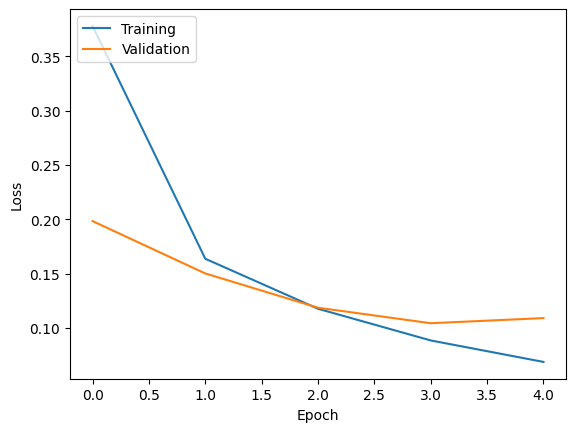

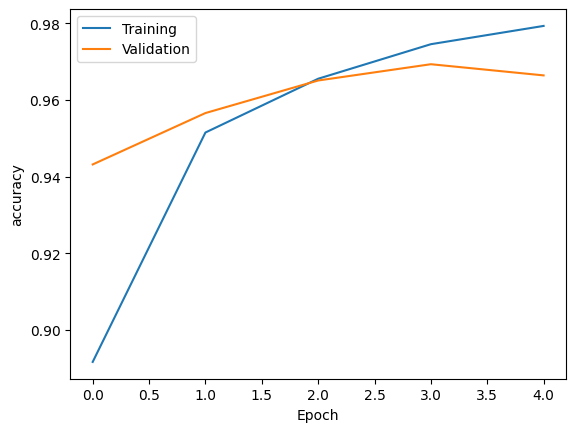

In [81]:
show_loss(result)
show_acc(result)

### 결론

1. 단일 은닉층을 사용한 ANN과 2개의 은닉층(100, 50 Nodes)를 통한 DNN 모델 간 손실과 정확도에는 큰 차이가 없다   

2. 다만 어디까지나 단순한 문제라 성능이 비슷하지 복잡한 이미지를 다루거나 학습 데이터가 많은 경우 ANN보다 DNN의 성능이 높은 모습을 보인다

## 컬러 이미지를 통한 분류 (CIFAR-10)

세부 링크 : [Link](https://www.cs.toronto.edu/~kriz/cifar.html)

> airplane부터 truck까지 총 10개의 레이블로 구성되어 있다.   
>
> RGB로 구성되어 있고, 32 * 32 이미지므로 데이터 하나의 형태는 (32, 32, 3) 로 되어있다

### 데이터 호출 및 shape 파악

> airplane : 0    
> automobile : 1    
> bird : 2    
> cat : 3     
> deer : 4    
> dog : 5    
> frog : 6     
> horse : 7    
> ship : 8    
> truck : 9   

In [82]:
import numpy as np
from tensorflow.python.keras.utils import np_utils
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(f'Data Shape : {x_train[1].shape}')
print(f'Data Label : {y_train[1]}')

Data Shape : (32, 32, 3)
Data Label : [9]


### 데이터 전처리 (라벨 원핫 인코딩, shape 변형, 정규화)

원핫 인코딩으로 변환하면 0,1인 이진 형태로 벡터가 만들어지는데 이를 다시 정수화로 시키기 위해서는 np.argmax(x , axis = 1) 를 사용한다

In [83]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print(f'One hot encoded label : {y_train[1]}')

One hot encoded label : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [84]:
# 데이터 수, 이미지 높이, 너비, 채널 수(RGB)
L, H, W, C = np.shape(x_train)

x_train = x_train.reshape(-1, H*W*C)
x_test = x_test.reshape(-1, H*W*C)

x_train.shape

(50000, 3072)

In [85]:
# 0~255 벡터를 정규화 시킨다.

x_train = x_train / 255
x_test = x_test / 255

In [86]:
# 함수화

def get_cifar_data():
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)

    L, H, W, C = np.shape(x_train)

    x_train = x_train.reshape(-1, H*W*C)
    x_test = x_test.reshape(-1, H*W*C)

    x_train = x_train / 255
    x_test = x_test / 255
    return (x_train, y_train), (x_test, y_test)

### 모델 구현 (MNIST + Dropout)

위 분류문제에서 사용한 MNIST Class를 조금 변형할 것이다.

Dropout 기법을 통해 과적합을 막을 예정이다.

이미지 하나는 3072 픽셀을 사용하기에 이는 인풋으로, dropout은 각각 0.2, Output은 레이블에 맞게 10개로 할당

In [87]:
class Cifar(Sequential):
    def __init__(self, inp, out):
        super().__init__()
        self.add(Dense(100, activation = 'relu', input_shape = (inp,), name = 'hidden1'))
        self.add(Dropout(0.0))
        self.add(Dense(50, activation = 'relu', name = 'hidden2'))
        self.add(Dropout(0.0))
        self.add(Dense(out, activation = 'softmax'))

        self.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [88]:
(x_train, y_train), (x_test, y_test) = get_cifar_data()

In [89]:
inp = 3072
out = 10

model = Cifar(inp, out)

In [90]:
y_train[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

### 학습

In [91]:
from tensorflow import device
with device('/cpu:0'):
    result = model.fit(x_train, y_train, epochs=100, batch_size=100, validation_split=0.2)

Epoch 1/100
 22/400 [>.............................] - ETA: 1s - loss: 2.3409 - accuracy: 0.1223

2022-11-20 23:13:37.360932: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


397/400 [============================>.] - ETA: 0s - loss: 1.9448 - accuracy: 0.2995

2022-11-20 23:13:39.761940: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


400/400 [==============================] - 3s 7ms/step - loss: 1.9440 - accuracy: 0.2999 - val_loss: 1.8098 - val_accuracy: 0.3634
Epoch 2/100
400/400 [==============================] - 2s 6ms/step - loss: 1.7651 - accuracy: 0.3723 - val_loss: 1.7266 - val_accuracy: 0.3836
Epoch 3/100
400/400 [==============================] - 2s 6ms/step - loss: 1.6913 - accuracy: 0.4001 - val_loss: 1.6946 - val_accuracy: 0.4027
Epoch 4/100
400/400 [==============================] - 2s 6ms/step - loss: 1.6511 - accuracy: 0.4121 - val_loss: 1.7063 - val_accuracy: 0.3923
Epoch 5/100
400/400 [==============================] - 2s 6ms/step - loss: 1.6084 - accuracy: 0.4258 - val_loss: 1.6184 - val_accuracy: 0.4279
Epoch 6/100
400/400 [==============================] - 2s 6ms/step - loss: 1.5816 - accuracy: 0.4369 - val_loss: 1.6131 - val_accuracy: 0.4239
Epoch 7/100
400/400 [==============================] - 2s 5ms/step - loss: 1.5625 - accuracy: 0.4422 - val_loss: 1.6168 - val_accuracy: 0.4148
Epoch 8/100

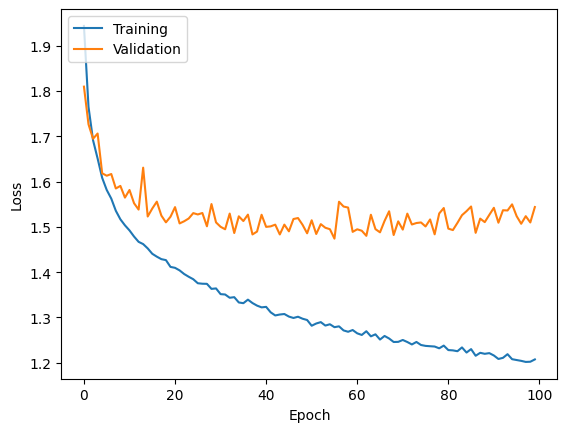

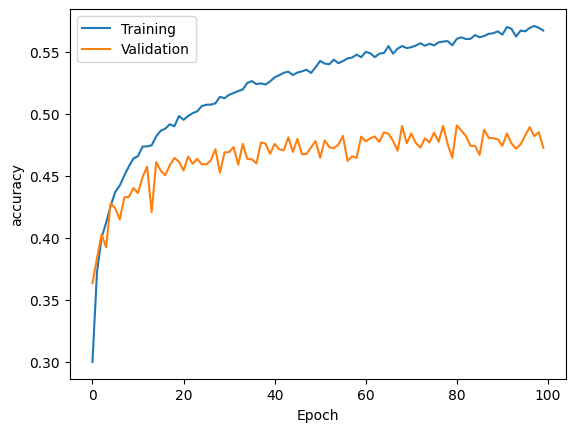

In [92]:
show_loss(result)
show_acc(result)

### Dropout [0.5, 0.5]

In [93]:
class Cifar_05(Sequential):
    def __init__(self, inp, out):
        super().__init__()
        self.add(Dense(100, activation = 'relu', input_shape = (inp,), name = 'hidden1'))
        self.add(Dropout(0.5))
        self.add(Dense(50, activation = 'relu', name = 'hidden2'))
        self.add(Dropout(0.5))
        self.add(Dense(out, activation = 'softmax'))

        self.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [94]:
(x_train, y_train), (x_test, y_test) = get_cifar_data()

In [95]:
inp = 3072
out = 10

model1 = Cifar_05(inp, out)

In [96]:
with device('/cpu:0'):
    result1 = model1.fit(x_train, y_train, epochs=100, batch_size=100, validation_split=0.2)

Epoch 1/100
 18/400 [>.............................] - ETA: 2s - loss: 2.4567 - accuracy: 0.1106

2022-11-20 23:17:18.606250: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


392/400 [============================>.] - ETA: 0s - loss: 2.2725 - accuracy: 0.1244

2022-11-20 23:17:20.690689: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


400/400 [==============================] - 3s 6ms/step - loss: 2.2718 - accuracy: 0.1244 - val_loss: 2.2115 - val_accuracy: 0.1710
Epoch 2/100
400/400 [==============================] - 2s 5ms/step - loss: 2.2370 - accuracy: 0.1319 - val_loss: 2.1689 - val_accuracy: 0.1801
Epoch 3/100
400/400 [==============================] - 2s 5ms/step - loss: 2.2323 - accuracy: 0.1354 - val_loss: 2.1507 - val_accuracy: 0.1879
Epoch 4/100
400/400 [==============================] - 2s 6ms/step - loss: 2.2286 - accuracy: 0.1386 - val_loss: 2.1763 - val_accuracy: 0.1752
Epoch 5/100
400/400 [==============================] - 2s 5ms/step - loss: 2.2272 - accuracy: 0.1353 - val_loss: 2.1574 - val_accuracy: 0.1807
Epoch 6/100
400/400 [==============================] - 2s 5ms/step - loss: 2.2254 - accuracy: 0.1365 - val_loss: 2.1397 - val_accuracy: 0.1871
Epoch 7/100
400/400 [==============================] - 2s 5ms/step - loss: 2.2229 - accuracy: 0.1404 - val_loss: 2.1503 - val_accuracy: 0.1810
Epoch 8/100

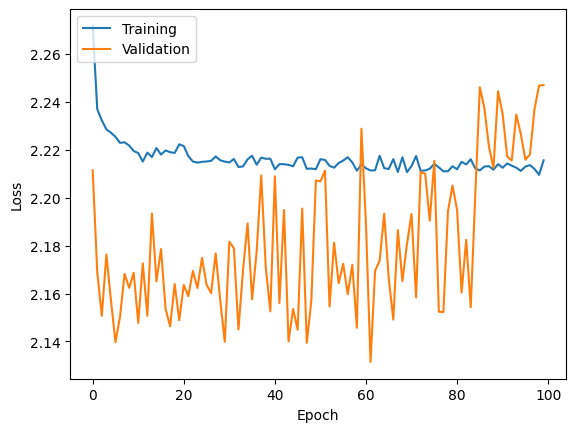

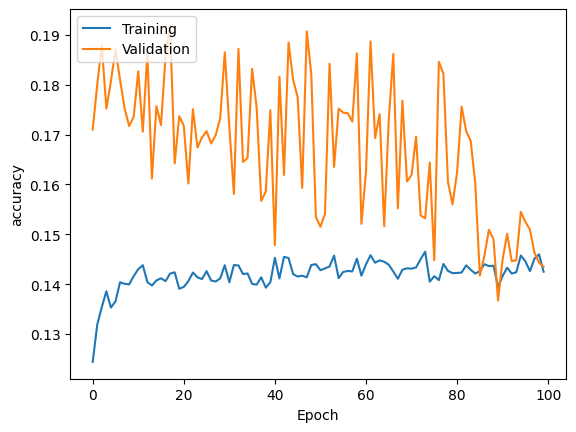

In [98]:
show_loss(result1)
show_acc(result1)

## 결론

1. 본 서적에서는 Dropout을 적용하면 과적합을 막아 좋은 결과를 낸다고 적어져 있지만 왠지 필자에겐 적용되지 않았고 오히려 더 안좋은 모습을 보여줌

2. 이미지 분류는 DNN으로 더 깊은 계층을 구성해야만 좋은 성능을 낼 수 있을까? 이미지 분류에서 Accuracy가 50% 채 되지 않는 다는 게 많이 아쉬울 다름이다.